In [1]:
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl


In [2]:
# Define the timefrase used for this project

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 11, 30)


In [3]:
# Import the data that we will use

df = web.DataReader(["AAPL","AMZN","FB","NFLX","GOOGL"], 'yahoo', start, end)
df.tail()
AdjClose = df['Adj Close']
AdjClose.tail()


Symbols,AAPL,AMZN,FB,NFLX,GOOGL
Date,,,,,
2019-11-22,261.779999,1745.719971,198.820007,310.480011,1293.670044
2019-11-25,266.369995,1773.839966,199.789993,315.549988,1305.640015
2019-11-26,264.290009,1796.939941,198.970001,312.489990,1313.000000
2019-11-27,267.839996,1818.510010,202.000000,315.929993,1312.130005
2019-11-29,267.250000,1800.800049,201.639999,314.660004,1304.089966


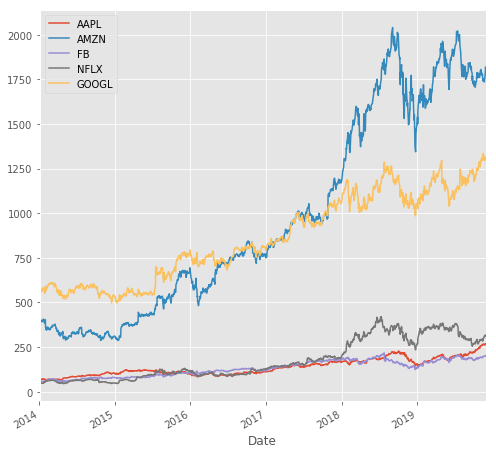

In [4]:
# Plot the Prices

mpl.rc('figure', figsize=(8,8))
style.use('ggplot')
AdjClose.plot(label='FAANG')
plt.legend()


In [5]:
# Daily and Monthly Returns

daily_returns = AdjClose.pct_change()
monthly_returns = AdjClose.resample('M').ffill().pct_change()


In [6]:
# Print Results

daily_returns.tail()
monthly_returns.tail()


Symbols,AAPL,AMZN,FB,NFLX,GOOGL
Date,,,,,
2019-07-31,0.076395,-0.014179,0.006373,-0.120685,0.125046
2019-08-31,-0.016461,-0.048474,-0.044071,-0.090529,-0.022714
2019-09-30,0.072962,-0.022733,-0.040879,-0.088953,0.025711
2019-10-31,0.110684,0.023475,0.076202,0.073948,0.030840
2019-11-30,0.077554,0.013587,0.052126,0.094812,0.035979


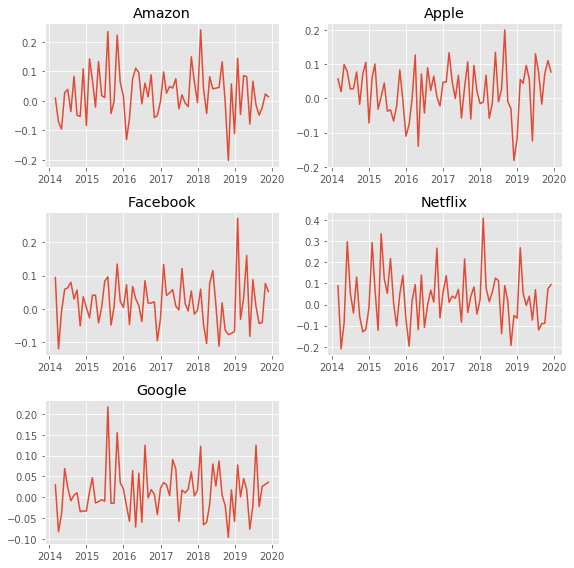

In [7]:
# Monthly Returns for FAANG

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(monthly_returns['AMZN'])
ax1.set_title("Amazon")
ax2.plot(monthly_returns['AAPL'])
ax2.set_title("Apple")
ax3.plot(monthly_returns['FB'])
ax3.set_title("Facebook")
ax4.plot(monthly_returns['NFLX'])
ax4.set_title("Netflix")
ax5.plot(monthly_returns['GOOGL'])
ax5.set_title("Google")
plt.tight_layout()
plt.show()


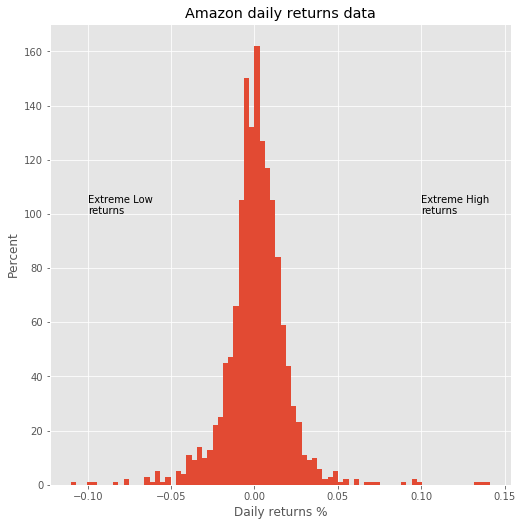

In [8]:
# Histogram for Daily returns for Amazon

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
daily_returns['AMZN'].plot.hist(bins = 80)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Amazon daily returns data")
ax1.text(-0.10,100,"Extreme Low\nreturns")
ax1.text(0.10,100,"Extreme High\nreturns")
plt.show()


In [9]:
# Cumulative Returns

cum_returns = (daily_returns + 1).cumprod()


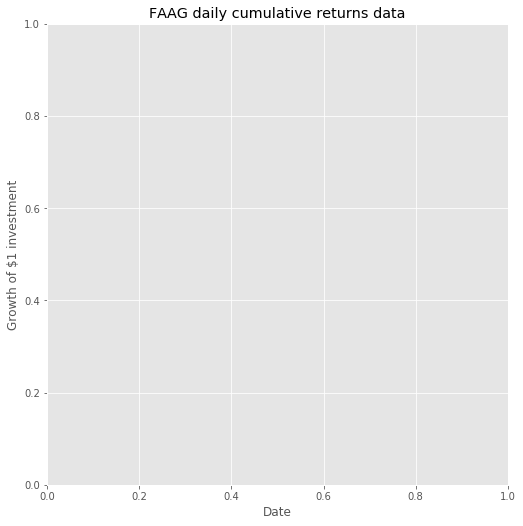

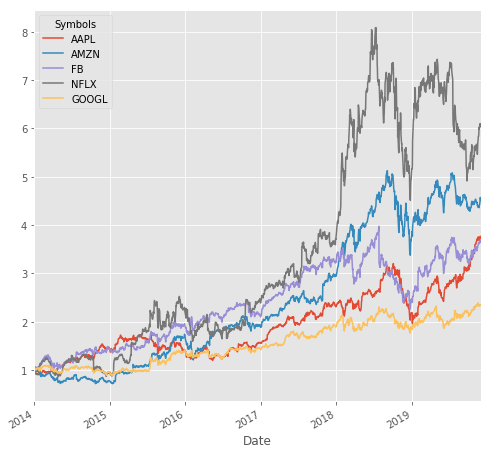

In [10]:
# Plot the cumulative returns for FAAG

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("FAAG daily cumulative returns data")
plt.show()


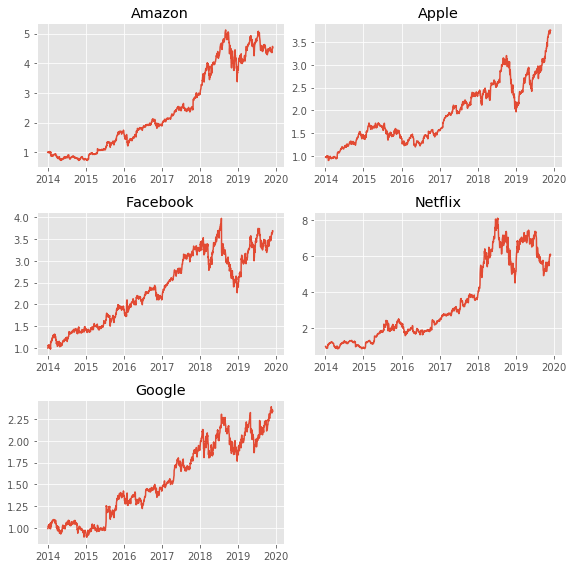

In [11]:
# Plot the cumulative returns in individual Graphs

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(cum_returns['AMZN'])
ax1.set_title("Amazon")
ax2.plot(cum_returns['AAPL'])
ax2.set_title("Apple")
ax3.plot(cum_returns['FB'])
ax3.set_title("Facebook")
ax4.plot(cum_returns['NFLX'])
ax4.set_title("Netflix")
ax5.plot(cum_returns['GOOGL'])
ax5.set_title("Google")
plt.tight_layout()
plt.show()


In [12]:
# Statistics for FAAG
# Mean Monthly Return

print(monthly_returns.mean()*100)
# Standard Deviation

print(monthly_returns.std())
# Correlation and Covariance for FAAG

corr = (monthly_returns.corr())
print(monthly_returns.cov())


Symbols
AAPL     2.320247
AMZN     2.656667
FB       1.916637
NFLX     3.193042
GOOGL    1.294435
dtype: float64
Symbols
AAPL     0.073294
AMZN     0.082338
FB       0.069642
NFLX     0.128014
GOOGL    0.057653
dtype: float64
Symbols      AAPL      AMZN        FB      NFLX     GOOGL
Symbols                                                  
AAPL     0.005372  0.002016  0.001825  0.002587  0.001475
AMZN     0.002016  0.006780  0.002799  0.006345  0.003066
FB       0.001825  0.002799  0.004850  0.003855  0.002096
NFLX     0.002587  0.006345  0.003855  0.016388  0.003420
GOOGL    0.001475  0.003066  0.002096  0.003420  0.003324


In [13]:
# Moving Average for FAAG

mavg30 = AdjClose.rolling(window=30).mean()
mavg50 = AdjClose.rolling(window=50).mean()
mavg100 = AdjClose.rolling(window=100).mean()


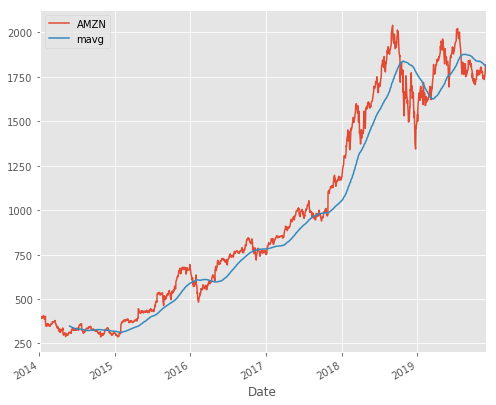

In [14]:
# Plot the moving average for Amazon

mpl.rc('figure', figsize=(8,7))
style.use('ggplot')
AdjClose["AMZN"].plot(label='AMZN')
mavg100["AMZN"].plot(label='mavg')
plt.legend()


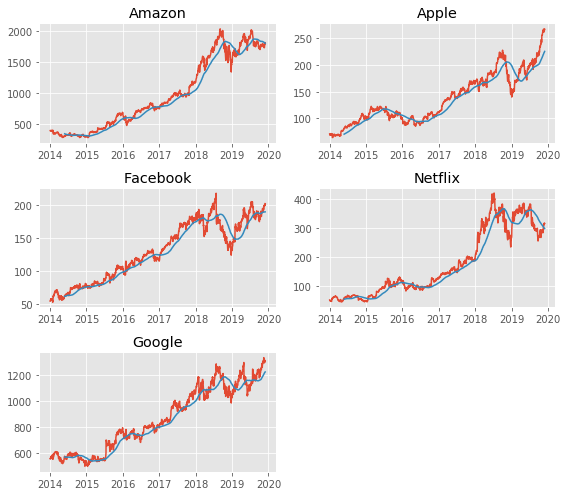

In [15]:
# Plot the moving average for all FAANG Stocks

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(AdjClose['AMZN'], label='AMZN')
ax1.plot(mavg100['AMZN'], label='mavg')
ax1.set_title("Amazon")
ax2.plot(AdjClose['AAPL'], label='AAPL')
ax2.plot(mavg100['AAPL'], label='mavg')
ax2.set_title("Apple")
ax3.plot(AdjClose['FB'], label='FB')
ax3.plot(mavg100['FB'], label='mavg')
ax3.set_title("Facebook")
ax4.plot(AdjClose['NFLX'], label='NFLX')
ax4.plot(mavg100['NFLX'], label='mavg')
ax4.set_title("Netflix")
ax5.plot(AdjClose['GOOGL'], label='GOOGL')
ax5.plot(mavg100['GOOGL'], label='mavg')
ax5.set_title("Google")
plt.tight_layout()
plt.show()


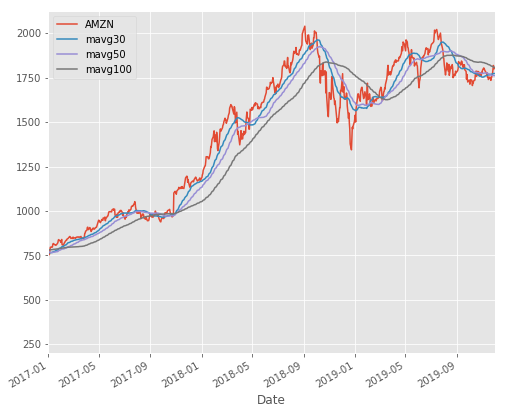

In [16]:
# Plot Simple Moving Averages for Amazon

mpl.rc('figure', figsize=(8,7))
style.use('ggplot')
AdjClose["AMZN"].plot(label='AMZN')
mavg30["AMZN"].plot(label='mavg30')
mavg50["AMZN"].plot(label='mavg50')
mavg100["AMZN"].plot(label='mavg100')
plt.xlim('2017-01-01','2019-11-30')
plt.legend()


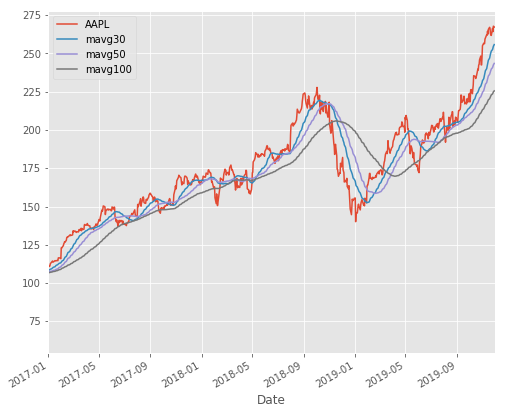

In [17]:
# Plot Simple Moving Averages for Apple

mpl.rc('figure', figsize=(8,7))
style.use('ggplot')
AdjClose["AAPL"].plot(label='AAPL')
mavg30["AAPL"].plot(label='mavg30')
mavg50["AAPL"].plot(label='mavg50')
mavg100["AAPL"].plot(label='mavg100')
plt.xlim('2017-01-01','2019-11-30')
plt.legend()


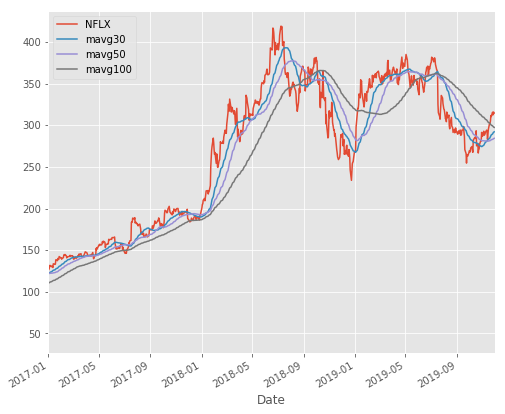

In [18]:
# Plot Simple Moving Averages for Netflix

mpl.rc('figure', figsize=(8,7))
style.use('ggplot')
AdjClose["NFLX"].plot(label='NFLX')
mavg30["NFLX"].plot(label='mavg30')
mavg50["NFLX"].plot(label='mavg50')
mavg100["NFLX"].plot(label='mavg100')
plt.xlim('2017-01-01','2019-11-30')
plt.legend()
